# Convolutional Neural Networks (CNN)

In this lab, we will cover convolutions and pooling in order to create CNNs. We also build a model to classify clothing items using the MNIST fashion dataset.

## Basic Imports

For this lab session, we will be needing Keras, Numpy and Tensorflow. <br>
We will build our CNN in Keras, but first we need to understand the underlying principles, for which we will use Tensorflow. <br>
Numpy will be mainly used for dataset preprocessing.

In [ ]:
import keras
import numpy as np

from numpy.random import seed
import tensorflow as tf

## Replicability
While experimenting and researching, it is important that your results can be __replicated by other people__. <br>
To ensure some level of replicability, we can __set the starting seed__ of both numpy and tensorflow __to known value__. <br>
Therefore, when we initialise our network to random values, these states can be calculated and replicated just by knowing the seed.

In [ ]:
seed(101)
tf.random.set_seed(101)

## Low Level Code

While building model, we will add whole convolution layer in a neat package `Conv2D()`. <br>
But before we do so, it is good to understand the __underlaying mechanics__ and __code implementation__ of convolutions. <br>
In the following example, we will define our image/data array `inputs`, and using `kernel` apply 2D convolution. <br>


A convolution input must have shape of `(BatchSize, width, height, inputChannels)` <br>
A convolution filter must have shape of `(width, height, inputChannels, outputChannels)` <br>

### Task
1) Experiment with different strides, kernel, padding etc. <br>
2) Why does first ouput element equal to 21.0?

# Convolutions

Convolutional Neural Networks (CNNs) are designed to learn features directly from image pixels. They can classify patterns or objects with extreme variability. Currently, they form the core of various __computer vision systems__ such as Facebook's automated photo tagging, handwritten characters recognition, self-driving cars, marine mammal detection, and medical image analysis. In this lab, we will start by exploring a convolution function which forms the heart of CNNs.

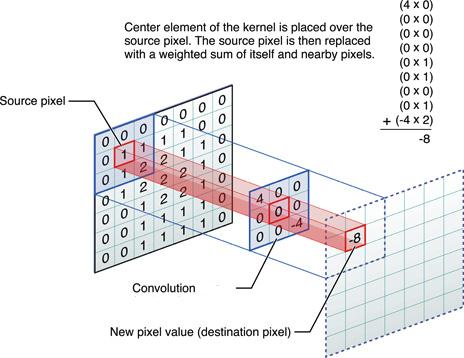




In [ ]:
# We need keras.backend and tensorflow to create proper tensors directly
import keras.backend as K
import tensorflow as tf


inputs = tf.constant([[[1.0],  [2.0],  [3.0],  [4.0],  [5.0]],
                      [[6.0],  [7.0],  [8.0],  [9.0],  [10.0]],
                      [[11.0], [12.0], [13.0], [14.0], [15.0]],
                      [[16.0], [17.0], [18.0], [19.0], [20.0]],
                      [[21.0], [22.0], [23.0], [24.0], [25.0]]
                     ])


kernel = tf.constant([[1.0,0.0,0.0],
                      [0.0,1.0,0.0],
                      [0.0,0.0,1.0]])



inputs = K.reshape(inputs,(-1,5,5,1))
print("Shape of an Input:", inputs.get_shape)

kernel =K.reshape(kernel,(3,3,1,1))
print("Shape of a Kernel", kernel.get_shape)

strides=(1, 1)
padding='valid'

result = K.conv2d(inputs, kernel, strides=strides, padding=padding)
print("Shape of result:", result.get_shape)

print("Result:", K.eval(result))

Shape of an Input: <bound method _EagerTensorBase.get_shape of <tf.Tensor: shape=(1, 5, 5, 1), dtype=float32, numpy=
array([[[[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.]],

        [[ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]],

        [[11.],
         [12.],
         [13.],
         [14.],
         [15.]],

        [[16.],
         [17.],
         [18.],
         [19.],
         [20.]],

        [[21.],
         [22.],
         [23.],
         [24.],
         [25.]]]], dtype=float32)>>
Shape of a Kernel <bound method _EagerTensorBase.get_shape of <tf.Tensor: shape=(3, 3, 1, 1), dtype=float32, numpy=
array([[[[1.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[1.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[1.]]]], dtype=float32)>>
Shape of result: <bound method _EagerTensorBase.get_shape of <tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[21.],
         [24.],
         [27.]],


# Pooling

## MaxPooling

Another important concept of CNNs is max-pooling, which is a form of
non-linear down-sampling. Max-pooling partitions the input image into a
set of non-overlapping rectangles and, for each such sub-region, outputs
the maximum value.
Max-pooling is useful in vision for two reasons:
- By eliminating non-maximal values, it reduces computation for upper layers.
- It provides a form of translation invariance.


## AveragePooling
Alternative to MaxPooling is Average pooling, where you take sum of all elements in pool and divide by number of elements. 

Experiment with different strides, kernel, padding etc. <br> 


In [ ]:
inputs = tf.constant([[[1.0],  [2.0],  [3.0],  [4.0],  [5.0]],
                      [[6.0],  [7.0],  [8.0],  [9.0],  [10.0]],
                      [[11.0], [12.0], [13.0], [14.0], [15.0]],
                      [[16.0], [17.0], [18.0], [19.0], [20.0]],
                      [[21.0], [22.0], [23.0], [24.0], [25.0]]
                     ])

inputs = K.reshape(inputs,(-1,5,5,1))
print("Shape of an Input:", inputs.get_shape)

pool_size = (2,2)
strides=(1, 1)
padding='valid'
data_format=None
pool_mode='max' # or use 'avg'

result = K.pool2d(inputs, pool_size=pool_size, strides = strides,
                          padding = padding, data_format = data_format,
                          pool_mode=pool_mode)

print(result.get_shape)
print("Result:", K.eval(result))

# Stride and Padding
- You might have noticed the padding and stride, but do you know what the stride and padding exactly are?
## Convolution animations

_N.B.: Blue maps are inputs, and cyan maps are outputs._

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_no_strides.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/arbitrary_padding_no_strides.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/same_padding_no_strides.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/full_padding_no_strides.gif"></td>
  </tr>
  <tr>
    <td>No padding, no strides</td>
    <td>Arbitrary padding, no strides</td>
    <td>Half padding, no strides</td>
    <td>Full padding, no strides</td>
  </tr>
  <tr>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides_odd.gif"></td>
    <td></td>
  </tr>
  <tr>
    <td>No padding, strides</td>
    <td>Padding, strides</td>
    <td>Padding, strides (odd)</td>
    <td></td>
  </tr>
</table>

## Transposed convolution animations

_N.B.: Blue maps are inputs, and cyan maps are outputs._

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_no_strides_transposed.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/arbitrary_padding_no_strides_transposed.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/same_padding_no_strides_transposed.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/full_padding_no_strides_transposed.gif"></td>
  </tr>
  <tr>
    <td>No padding, no strides, transposed</td>
    <td>Arbitrary padding, no strides, transposed</td>
    <td>Half padding, no strides, transposed</td>
    <td>Full padding, no strides, transposed</td>
  </tr>
  <tr>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides_transposed.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides_transposed.gif"></td>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides_odd_transposed.gif"></td>
    <td></td>
  </tr>
  <tr>
    <td>No padding, strides, transposed</td>
    <td>Padding, strides, transposed</td>
    <td>Padding, strides, transposed (odd)</td>
    <td></td>
  </tr>
</table>

## Dilated convolution animations

_N.B.: Blue maps are inputs, and cyan maps are outputs._

<table style="width:25%"; table-layout:fixed;>
  <tr>
    <td><img width="150px" src="https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/dilation.gif"></td>
  </tr>
  <tr>
    <td>No padding, no stride, dilation</td>
  </tr>
</table>

### Reference: [https://github.com/vdumoulin/conv_arithmetic](https://github.com/vdumoulin/conv_arithmetic)

## <font color='red'>Task 1</font>
We have a input of (1x4x4x1)
- Can you output make a Conv2D that give the output that is the same size as the input?
- Can you make the output a half smaller than the original output? `(1x2x2x1)`
- You can verify by printing out the result.shape

In [ ]:
inputs = tf.constant([[[1.0],  [2.0],  [3.0],  [4.0]],
                      [[6.0],  [7.0],  [8.0],  [9.0]],
                      [[16.0], [17.0], [18.0], [19.0]],
                      [[21.0], [22.0], [23.0], [24.0]]
                     ])

inputs = K.reshape(inputs,(-1,4,4,1))
print("Shape of an Input:", inputs.shape)
# Your code here (make the same size)

# Make sure your output's shape is the same as the input

# Your code here (make a half smaller)

# Make sure your output's shape is the same as the input


# Using these techniques in a Keras Sequential model

Keras provides convolution and [pooling](https://keras.io/api/layers/pooling_layers/) layers, which can be used as-is, such as [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/).

Pay close attention to the input and output shapes, as well as the optional parameters which may come in handy.

We will walk through building a CNN handwritten digits classifier using the MNIST which is one of the classical datasets for neural networks. <br>


## <font color='red'>Tasks</font>
- Please load the mnist data using Keras (hint [check the API](https://keras.io/api/datasets/mnist/))

In [ ]:
from keras.datasets import mnist
# Your code here, replace None with mnist data
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Visualizing the dataset
We will use __matplot library__ to display an image from the MNIST dataset. <br>
`%matplotlib inline` will allow us to display this image directly in Jupyter Notebook cell. <br>
Since we have __grayscale__ image, we need to specify that, while displaying it via `cmap='gray'`
## <font color='red'>Task</font>
- Please try to visualize more image data, so you can grasp what is in it

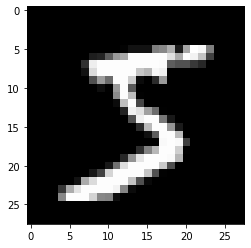

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(X_train_orig[0], cmap='gray')

In [ ]:
# Your code here, try to plot another image, maybe X_train_orig[1] or other image you like

In [ ]:
# Try to print the raw value from data, to see what is it like

# Try to print the size a image, so you might know how it looks numerically


# Shaping dataset

## Images
Currently, the X part of dataset is in form `(number_of_samples, px_width, px_height)` <br>
There is one implied information about the dataset, but we need to directly specify it. This information is regarding number of channels per image. Since MNIST dataset is only greyscale, we need to specify it in the dimensionality of the dataset.
Therefore, we need to convert it from `(60000, 28, 28)` to `(60000,28,28,1)`, where `1` stands for greyscale. <br>
If we had an RGB image, the shape of the dataset would look like this `(60000,28,28,3)`

In [ ]:
X_train = X_train_orig.reshape(60000,28,28,1)
X_test = X_test_orig.reshape(10000,28,28,1)

## Labels

Label for each image is in form of an __integer__ ranging from 0 to 9. <br>
We can use a __one hot encoding__ to transform them into a __binary matrix__. We know there are 10
classes for this problem, so we can expect the binary matrix to have a width
of 10.

### Converting labels to one-hot representation
y_train_orig[0] <b>before</b> conversion is <b>[5]</b> <br>
y_train_orig[0] <b>after</b> conversion is <b>[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]</b>

In [ ]:
print(y_train_orig[0])

In [ ]:
from tensorflow.keras.utils import to_categorical
to_categorical(y_train_orig[0], 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Converting all labels to one-hot matrix
We will use the same `to_categorical` function to convert the whole dataset into matrix of one-hot encodings.

1) What is the shape of newly created dataset? <br>
2) [Optional] Instead of pre-made `to_categorical` function, can you code your own with same functionality?

In [ ]:
y_train = to_categorical(y_train_orig)
y_test = to_categorical(y_test_orig)

# Building the model
In this section we will combine previously demonstrated mechanisms into one system. <br>

For this very simple model, we will be using `Conv2D`, `Flatten` and `Dense` layers. `Dense` = fully-connected.



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

def create_model():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
    model.add(Conv2D(32, kernel_size=3, activation="relu"))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    
    return model

In [ ]:
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=64)  # Notice the handy validation_split parameter, no need to create validation splits manually!

## Data Normalization
Though we can observe that the neural network is learning, the rate is __very slow__ and __learning rate deteriorates very quickly__. <br>
This behaviour is due to extreme differences between `max` (255) and `min` (0) values of our dataset. <br>
Neural networks are performing __best when dataset ranges from 0 to 1__, or in some cases -1 to 1. <br>
Since we can imagine these values as signal strength, very high values, such as 255, are way too overpowering and strengthening non-optimal paths too quickly. <br>
Therefore we need to divide our training and testing dataset by 255 to get values ranging from 0 to 1. 


In [ ]:
X_train = X_train/255
X_test = X_test/255

## Training on Normalized dataset
We will generate a new model and train it on normalized dataset. <br>


In [ ]:
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=4, batch_size=64)

And to evaluate, we can use `model.evaluate` which:

> Returns the loss value & metrics values for the model in test mode.

In [ ]:
model.evaluate(X_test, y_test)

## Tensorflow Playground

To better visualise the importance of feature maps and feature extraction you can visit the following website and experiment with the structure of the network, hyperparameters to get instant visual feedback and see how your changes reflect the detection of features:

[Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.77793&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)


# Challenge Part: Flowers
Provided is a dataset of two types of flower, buttercups and artichokes. Build a CNN to identify the flower type.

The authors of the full dataset help to visualise the classes:

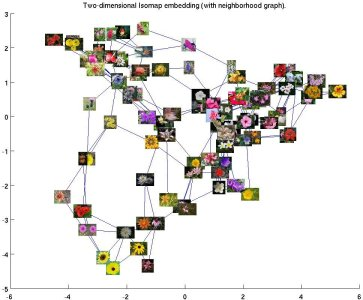

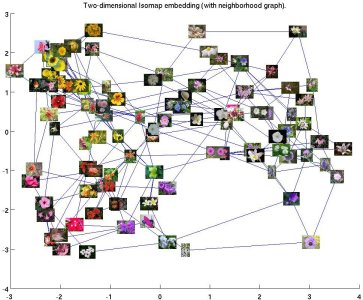

From this, we can see that colour data could be very helpful to our model...

Set the Kaggle parameters:

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'illyagloba'  # Your Kaggle username
os.environ['KAGGLE_KEY'] = '0ffde78b85da69f118ad2bba242f7c45'  # Your Kaggle API key
os.environ['URN'] = '6604778'  # Your URN: submissions without a URN will not count

Now [join the competition](https://www.kaggle.com/t/a61fa0d926a6499abff0749108be7e03), then download the dataset:

In [ ]:
!python3 /usr/local/bin/kaggle competitions download -c uos-com2028-21-22-lab5 --force
!unzip uos-com2028-21-22-lab5.zip

  0% 0.00/5.25M [00:00<?, ?B/s]
100% 5.25M/5.25M [00:00<00:00, 142MB/s]
Archive:  uos-com2028-21-22-lab5.zip
replace ABFlowerTest/00.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: ABFlowerTest/00.jpg     
replace ABFlowerTest/01.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ABFlowerTest/01.jpg     
replace ABFlowerTest/02.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ABFlowerTest/02.jpg     
replace ABFlowerTest/03.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ABFlowerTest/03.jpg     
replace ABFlowerTest/04.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ABFlowerTest/05.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

We can use the [`image_dataset_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) utility function to load the images. This is handy because it won't load all the images at once (which can cause you to run out of memory: if using Colab, see the RAM indicator in the toolbar).

Now to load the dataset:

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

# Up to you: RGB is default, but perhaps colours aren't that helpful...?
colour_mode = 'rgb'

# Up to you: change the image size if desired. Perhaps they don't need to be that big.
image_size = (100, 100)

# Up to you: training batch size.
batch_size = 12

train_flowers_dataset = image_dataset_from_directory(
  'ABFlowerTrain',
  color_mode=colour_mode,
  validation_split=0.2,
  subset='training',
  seed=42,
  label_mode='binary',  # There are two classes for this task.
  image_size=image_size,
  batch_size=batch_size)

validation_flowers_dataset = image_dataset_from_directory(
  'ABFlowerTrain',
  color_mode=colour_mode,
  validation_split=0.2,
  subset='validation',
  seed=42,
  label_mode='binary',  # There are two classes for this task.
  image_size=image_size,
  batch_size=batch_size)

test_flowers_dataset = image_dataset_from_directory(
  'ABFlowerTest',
  shuffle=False,  # Important: the test dataset order must match Kaggle!
  labels=None,  # Important: the test dataset has no labels...
  color_mode=colour_mode,
  image_size=image_size,
  batch_size=1)  # Don't batch the test samples.

print('Train label names:', train_flowers_dataset.class_names)
print('Test label names (empty):', test_flowers_dataset.class_names)

Found 96 files belonging to 2 classes.
Using 77 files for training.
Found 96 files belonging to 2 classes.
Using 19 files for validation.
Found 23 files belonging to 1 classes.
Train label names: ['A', 'B']
Test label names (empty): ['']


Let's take a look:

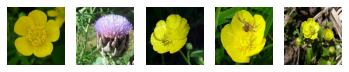

In [ ]:
for images, labels in train_flowers_dataset.take(1):
  for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.axis('off')

Since this is a binary classification task, you can use one-hot or boolean/integer encoding for the targets. 

The dataset currently uses 0 and 1 for the targets: making the classifier an 'Is artichoke?' (or 'Is buttercup?', depending on ordering) classifier.

You can change this to one-hot encoding if you want using a `label_mode` of `categorical`.

Now create a Keras sequential model using the techniques covered in today's lab:

In [ ]:
# To normalise the dataset without first loading the images into memory, we can use a Rescaling layer.
# This means images are normalised when given as input to the model.
from keras.layers import Rescaling

# Your code here: create the model
model = Sequential([
  Rescaling(1./255),
  Conv2D(64, kernel_size=3, padding='same', activation='relu', input_shape=(100,100,3)),
  Conv2D(32, kernel_size=3, padding='same', activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid')
  # Your layers here.
])

precision = keras.metrics.Precision()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision])
model.fit(train_flowers_dataset, validation_data=validation_flowers_dataset, epochs=10)
# Your code here: compile the model with suitable losses and metrics.

# Now train the model...
#model.fit(train_flowers_dataset, validation_data=validation_flowers_dataset, epochs=???)

Epoch 1/10
7/7 [==============================] - 5s 544ms/step - loss: 1.1246 - accuracy: 0.5455 - precision_1: 0.5185 - val_loss: 0.2098 - val_accuracy: 0.9474 - val_precision_1: 0.9167
Epoch 2/10
7/7 [==============================] - 3s 459ms/step - loss: 0.1988 - accuracy: 0.9221 - precision_1: 0.8947 - val_loss: 0.0540 - val_accuracy: 1.0000 - val_precision_1: 1.0000
Epoch 3/10
7/7 [==============================] - 3s 453ms/step - loss: 0.0306 - accuracy: 1.0000 - precision_1: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000 - val_precision_1: 1.0000
Epoch 4/10
7/7 [==============================] - 3s 454ms/step - loss: 0.0063 - accuracy: 1.0000 - precision_1: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000 - val_precision_1: 1.0000
Epoch 5/10
7/7 [==============================] - 3s 447ms/step - loss: 0.0139 - accuracy: 0.9870 - precision_1: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000 - val_precision_1: 1.0000
Epoch 6/10
7/7 [==============================] - 3s 450ms/s

Now for the predictions:


In [ ]:
predictions = model.predict(test_flowers_dataset)


You may need to threshold or convert from one-hot encoding to get the correct labels, which should be 'A' for artichoke or 'B' for buttercup (not 0 or 1!). See week 3's lab for an example of this.

Set `final_predictions` to the final labelled outputs for the test samples, consisting of only 'A's or 'B's.

In [ ]:
# Example for an integer output:
final_predictions = ['B' if prediction > 0.5 else 'A' for prediction in predictions]

# Example for one-hot:
#final_predictions = ['B' if prediction == 1 else 'A' for prediction in np.argmax(predictions, axis=1)]

Save the output to a CSV:

In [ ]:
from pandas import DataFrame
DataFrame(data={'Flower': final_predictions}).to_csv('predictions.csv', index_label='Id')

And to submit to Kaggle:

In [ ]:
!python3 /usr/local/bin/kaggle competitions submit -m $URN -c uos-com2028-21-22-lab5 -f predictions.csv

100% 115/115 [00:00<00:00, 184B/s]
Successfully submitted to COM2028 21/22 Lab 5

Now you've completed the task, think about the following.

For this task, did we really need a CNN?

Could we have just averaged the image's colours to identify the flower?

If so, when might something like averaging colours not work?

